In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hepatitis_csv.csv')

df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [3]:
df.shape

(155, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [5]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [6]:
null_counts = df.isna().sum()

null_counts = null_counts[null_counts > 0]

In [7]:
for col in null_counts.index:
    if null_counts[col] > 5:
        df.drop(columns=[col], inplace=True)
    else:
        df[col].fillna(df[col].value_counts().idxmax(), inplace=True)

In [8]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,spleen_palpable,spiders,ascites,varices,sgot,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,18.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,42.0,False,live
2,78,female,True,False,True,False,False,False,False,False,False,32.0,False,live
3,31,female,True,True,False,False,False,False,False,False,False,52.0,False,live
4,34,female,True,False,False,False,False,False,False,False,False,200.0,False,live


In [9]:
for col in df.columns:
    uniques = df[col].unique()
    if len(uniques) == 2:
        mapper = {uniques[0]: 0, uniques[1]: 1}
        df[col] = df[col].map(mapper)

In [10]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,spleen_palpable,spiders,ascites,varices,sgot,histology,class
0,30,0,0,0,0,0,0,0,0,0,0,18.0,0,0
1,50,1,0,0,1,0,0,0,0,0,0,42.0,0,0
2,78,1,1,0,1,0,0,0,0,0,0,32.0,0,0
3,31,1,1,1,0,0,0,0,0,0,0,52.0,0,0
4,34,1,1,0,0,0,0,0,0,0,0,200.0,0,0


<AxesSubplot:>

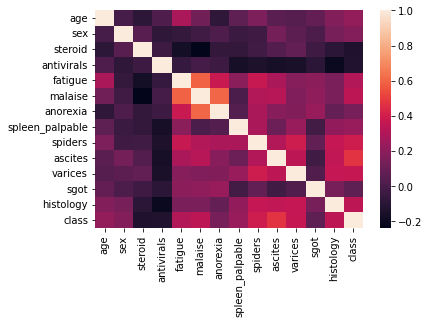

In [11]:
sns.heatmap(df.corr())

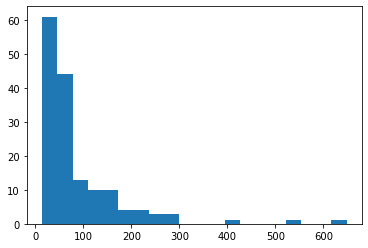

In [25]:
plt.hist(df['sgot'], bins=20)
plt.show()

In [27]:
idx = np.where(df['sgot'] > 300)[0]

df.drop(index=idx, inplace=True)

In [31]:
X = df['age'].values.reshape(-1, 1)
Y = df['sgot'].values.reshape(-1, 1)

In [32]:
X[:5]

array([[30],
       [50],
       [78],
       [31],
       [34]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [35]:
model.fit(X_train, Y_train)

LinearRegression()

In [36]:
model.score(X_test, Y_test)

-0.03177127944992719

In [37]:
X_ = np.linspace(5, 80, 100).reshape(-1, 1)

Y_pred = model.predict(X_)

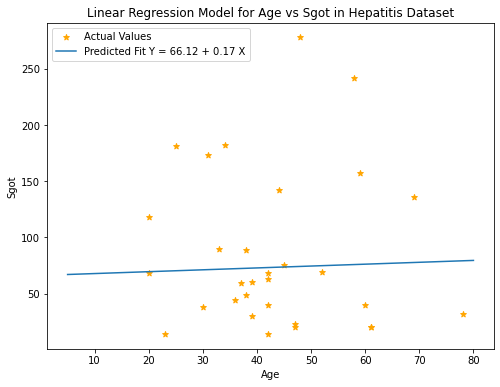

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, marker='*', color='orange', label='Actual Values')
plt.plot(X_, Y_pred, label='Predicted Fit Y = %.2f + %.2f X' % (model.intercept_, model.coef_[0]))
plt.xlabel('Age')
plt.ylabel('Sgot')
plt.title('Linear Regression Model for Age vs Sgot in Hepatitis Dataset')
plt.legend()
plt.show()